#Import DataSet From Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [3]:
for dirpath,dirname, filenames in os.walk(path):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /kaggle/input/brain-tumor-mri-dataset
There are 4 directories and 0 images in /kaggle/input/brain-tumor-mri-dataset/Training
There are 0 directories and 1457 images in /kaggle/input/brain-tumor-mri-dataset/Training/pituitary
There are 0 directories and 1595 images in /kaggle/input/brain-tumor-mri-dataset/Training/notumor
There are 0 directories and 1339 images in /kaggle/input/brain-tumor-mri-dataset/Training/meningioma
There are 0 directories and 1321 images in /kaggle/input/brain-tumor-mri-dataset/Training/glioma
There are 4 directories and 0 images in /kaggle/input/brain-tumor-mri-dataset/Testing
There are 0 directories and 300 images in /kaggle/input/brain-tumor-mri-dataset/Testing/pituitary
There are 0 directories and 405 images in /kaggle/input/brain-tumor-mri-dataset/Testing/notumor
There are 0 directories and 306 images in /kaggle/input/brain-tumor-mri-dataset/Testing/meningioma
There are 0 directories and 300 images in /kaggle/input/brai

The dataset is currently located in a cache directory. To make it more accessible and visible in the Colab file browser, I will copy it to the `/content/` directory.

In [4]:
import shutil
import os

destination_path = os.path.join("/content", os.path.basename(path))

# Check if the destination directory already exists
if os.path.exists(destination_path):
    print(f"Directory '{destination_path}' already exists. Skipping copy.")
else:
    print(f"Copying dataset from {path} to {destination_path}...")
    shutil.copytree(path, destination_path)
    print("Copy complete.")

print(f"Dataset is now available at: {destination_path}")

# Update the 'path' variable to point to the new location for consistency in subsequent steps
path = destination_path

# Verify contents of the new directory
print("Contents of the new dataset directory:")
for item in os.listdir(path):
    print(f"- {item}")

Copying dataset from /kaggle/input/brain-tumor-mri-dataset to /content/brain-tumor-mri-dataset...
Copy complete.
Dataset is now available at: /content/brain-tumor-mri-dataset
Contents of the new dataset directory:
- Testing
- Training


In [7]:
train_data_dir = os.path.join("Brain_MRI", "Training")
test_data_dir = os.path.join("Brain_MRI", "Testing")

In [8]:
print(os.listdir(train_data_dir))
print(os.listdir(test_data_dir))

['notumor', 'glioma', 'meningioma', 'pituitary']
['notumor', 'glioma', 'meningioma', 'pituitary']


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_data_dir,
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_data_dir,
                                             target_size=(256,256),
                                             batch_size=32,
                                             class_mode="categorical")

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [10]:
import random
def Image_Visualization():
  meningioma = os.path.join(train_data_dir, "meningioma")
  glioma = os.path.join(train_data_dir, "glioma")
  pituitary = os.path.join(train_data_dir, "pituitary")
  notumor = os.path.join(train_data_dir, "notumor")
  meningioma_images = random.sample(os.listdir(meningioma),1)
  glioma_images = random.sample(os.listdir(glioma),1)
  pituitary_images = random.sample(os.listdir(pituitary),1)
  notumor_images = random.sample(os.listdir(notumor),1)

  img_path_meningioma = os.path.join(meningioma, meningioma_images[0])
  img_path_glioma = os.path.join(glioma, glioma_images[0])
  img_path_pituitary = os.path.join(pituitary, pituitary_images[0])
  img_path_notumor = os.path.join(notumor, notumor_images[0])

  img_meningioma = mpimg.imread(img_path_meningioma)
  img_glioma = mpimg.imread(img_path_glioma)
  img_pituitary = mpimg.imread(img_path_pituitary)
  img_notumor = mpimg.imread(img_path_notumor)

  fig, axes = plt.subplots(2,2, figsize=(10,10))
  axes[0,0].imshow(img_meningioma)
  axes[0,0].set_title("Meningioma")
  axes[0,1].imshow(img_glioma)
  axes[0,1].set_title("Glioma")
  axes[1,0].imshow(img_pituitary)
  axes[1,0].set_title("Pituitary Tumor")
  axes[1,1].imshow(img_notumor)
  axes[1,1].set_title("Normal/Healthy")
  plt.legend("Image Visualization of the Different Types of Brain MRI")
  plt.tight_layout()
  plt.axis("off")
  plt.show()


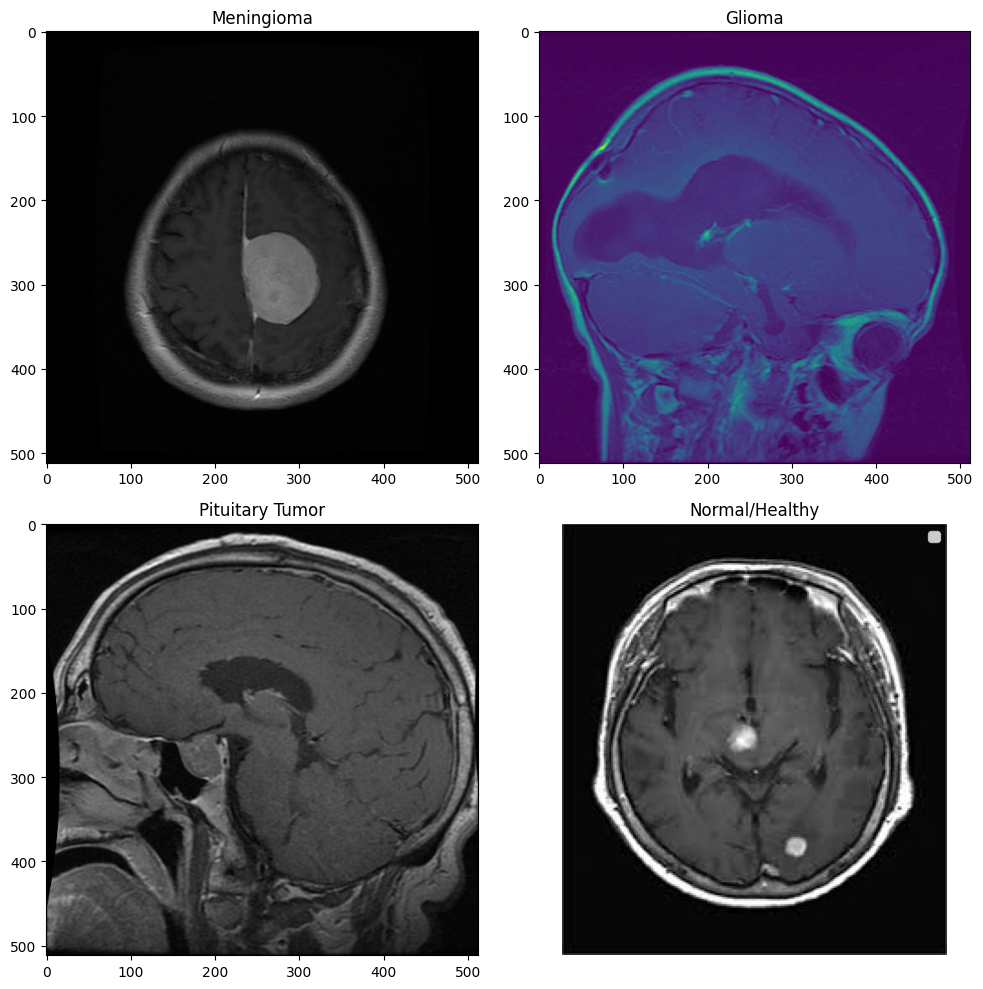

In [11]:
Image_Visualization()

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
checkpoint =  ModelCheckpoint(
    monitor="val_accuracy",
    save_best_only = True,
    mode = "max",
    filepath = "model1.keras",
    verbose = 1
)

In [14]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 256,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (256,256,3),
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="same"),
    tf.keras.layers.Conv2D(filters = 256,
                           kernel_size = 3,
                           activation = "relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(filters = 128,
                           kernel_size = 3,
                           activation = "relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="same"),
    tf.keras.layers.Conv2D(filters = 128,
                           kernel_size = 3,
                           activation = "relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = 3,
                           activation = "relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="same"),
    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = 3,
                           activation = "relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = 3,
                           activation = "relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128,
                          activation = "relu"),
    tf.keras.layers.Dense(units = 64,
                          activation = "relu"),
    tf.keras.layers.Dense(units = 32,
                          activation = "relu"),
    tf.keras.layers.Dense(units = 4,
                          activation = "softmax")

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
               metrics = ["accuracy","auc","recall","precision"])

In [16]:
history1 = model1.fit(train_data, steps_per_epoch=len(train_data),
                      epochs = 25,
                      validation_data = test_data,
                      validation_steps = len(test_data),
                      callbacks = [checkpoint])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.4843 - auc: 0.7418 - loss: 1.1201 - precision: 0.6021 - recall: 0.2552
Epoch 1: val_accuracy improved from -inf to 0.74600, saving model to model1.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 205s 929ms/step - accuracy: 0.4850 - auc: 0.7425 - loss: 1.1188 - precision: 0.6029 - recall: 0.2564 - val_accuracy: 0.7460 - val_auc: 0.9270 - val_loss: 0.6466 - val_precision: 0.7937 - val_recall: 0.6720
Epoch 2/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.7961 - auc: 0.9497 - loss: 0.5376 - precision: 0.8222 - recall: 0.7575
Epoch 2: val_accuracy improved from 0.74600 to 0.74981, saving model to model1.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 121s 672ms/step - accuracy: 0.7961 - auc: 0.9497 - loss: 0.5373 - precision: 0.8222 - recall: 0.7576 - val_accuracy: 0.7498 - val_auc: 0.9330 - val_loss: 0.6628 - val_precision: 0.7609 - val_recall: 0.7330
Epoch 3/25
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.8388 - auc: 0.969

##After Training our Model We Got Testing Accuracy of 97%
### Lets Evaluate and save Model

In [17]:
best_model = tf.keras.models.load_model("model1.keras")
best_model.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.9794 - auc: 0.9975 - loss: 0.0775 - precision: 0.9798 - recall: 0.9794


[0.11076860129833221,
 0.9763539433479309,
 0.9951372146606445,
 0.9763539433479309,
 0.9770992398262024]

###Summary of Our Model

In [18]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,588,110 (13.69 MB)

 Trainable params: 1,196,036 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,392,074 (9.13 MB)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Saving the Model in my Drive for future reference

In [20]:
best_model.save('/content/drive/MyDrive/brain_tumor_model2.keras')

In [21]:
import numpy as np
y_true = test_data.classes
test_data.shuffle = False
pred_prob = best_model.predict(test_data)
y_pred = np.argmax(pred_prob, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step


In [22]:
class_names = os.listdir("Brain_MRI/Testing")
class_names

['notumor', 'glioma', 'meningioma', 'pituitary']

In [23]:
best_model.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9608 - auc: 0.9913 - loss: 0.1844 - precision: 0.9620 - recall: 0.9608


[0.110768623650074,
 0.9763539433479309,
 0.9951372146606445,
 0.9763539433479309,
 0.9770992398262024]

Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step


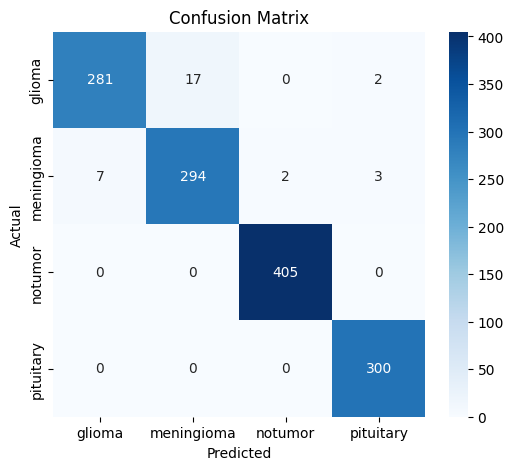

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_dir = "/content/Brain_MRI/Testing"
test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_data.reset()
#eval_results = best_model2.evaluate(test_data)
#print("Test results:", eval_results)

test_data.reset()
pred_probs = best_model.predict(test_data)
y_pred = np.argmax(pred_probs, axis=1)

y_true = test_data.classes

class_indices = test_data.class_indices
class_names = [k for k, v in sorted(class_indices.items(), key=lambda x: x[1])]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##The Model very well Predicts No Tumor and Pituitary tumor
>With an overall accuracy of ~95% the model works very Nice

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step


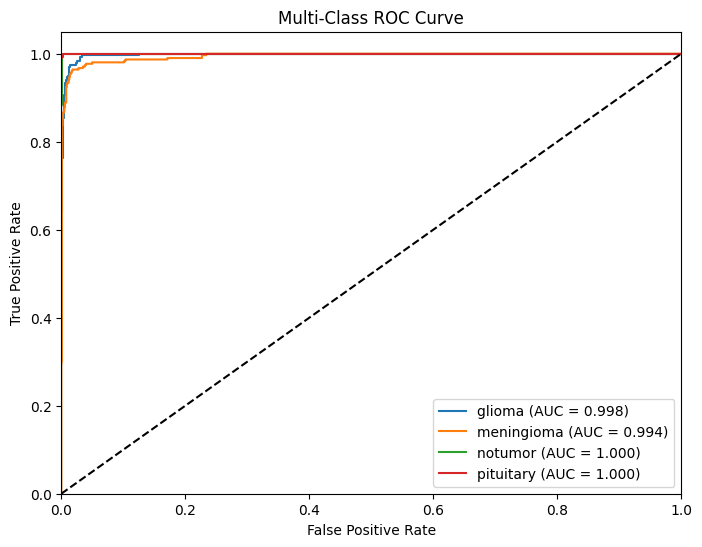

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

test_data.shuffle = False
test_data.reset()

y_prob = best_model.predict(test_data)
y_true = test_data.classes
num_classes = len(test_data.class_indices)
y_true_oh = to_categorical(y_true, num_classes=num_classes)

class_indices = test_data.class_indices
class_names = [name for name, idx in sorted(class_indices.items(), key=lambda x: x[1])]

plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_oh[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.show()
